In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

# Problem2

### (a)
#### Heun's Method:  $y_{k+1}^h = y_k^h + \frac{h_k}{2}(f(x_k,y_k^h) + f(x_{i+k},y_k^h + h_k f(x_k, y_k^h)))$
#### For a given h, $y_{k+1} = y_k + \frac{h}{2} [f(x_k,y_k) + f(x_{k+1},y_k+h f(x_k, y_k))]$
#### $f(x_k,y_k) = \frac{dy_k}{dx_k} = \lambda y_k$,   $f(x_{k+1},y_k+h f(x_k, y_k)) = \frac{d(y_k + h \lambda y_k)}{dx_{k+1}} = \frac{d(y_k + h \lambda y_k)}{d(x_k+h)} = (1+h\lambda)\frac{dy_k}{dx_k} = (1+h\lambda)\lambda y_k$
#### Now we get $y_{k+1} = y_k + \frac{h}{2}[\lambda y_k + (1+h\lambda)\lambda y_k] = (1+h\lambda + \frac{h^2\lambda^2}{2})y_k$

### (b)
#### Fourth-order Explicit Runge–Kutta methods compute an approximation $y_{i+1}^h$ of $y(x_{i+1})$ using
#### $Y_1=y_i$
#### $Y_2=y_i+\frac{h_i}{2}f(x_i,Y1)=y_i+\frac{h}{2}f(x_i,y_i)=y_i+\frac{h}{2}\lambda y_i=(1+\frac{\lambda h}{2})y_i$

#### $Y_3=y_i+\frac{h_i}{2}f(x_i+\frac{h_i}{2},Y2)=y_i+\frac{h}{2}f(x_i+\frac{h}{2},(1+\frac{\lambda h}{2})y_i)=y_i+\frac{h}{2}(1+\frac{\lambda h}{2})\lambda y_i = (1 + \frac{\lambda h}{2}+\frac{\lambda^2h^2}{4})y_i$

#### $Y_4=y_i+h_i f(x_i+\frac{h_i}{2},Y3)=y_i+hf(x_i+h,(1 + \frac{\lambda h}{2}+\frac{\lambda^2h^2}{4})y_i)=y_i+h(1 + \frac{\lambda h}{2}+\frac{\lambda^2h^2}{4})\lambda y_i=(1+h\lambda+\frac{h^2\lambda^2}{2}+\frac{h^3\lambda^3}{4})y_i$

#### $y_{i+1}=y_i+\frac{h_i}{6}(f(x_i,Y_1)+2f(x_i+\frac{h_i}{2},Y_2)+2f(x_i+\frac{h_i}{2},Y_3)+f(x_{i+1},Y_4))$
$=y_i+\frac{h}{6}(f(x_i,y_i)+2f(x_i+\frac{h}{2},(1+\frac{\lambda h}{2})y_i)+2f(x_i+\frac{h}{2},(1 + \frac{\lambda h}{2}+\frac{\lambda^2h^2}{4})y_i)+f(x_i+h, (1+h\lambda+\frac{h^2\lambda^2}{2}+\frac{h^3\lambda^3}{4})y_i))$

#### $=y_i+\frac{h}{6}(\lambda y_i+2(\lambda+\frac{\lambda^2h}{2})y_i+2(\lambda+\frac{\lambda^2h}{2}+\frac{\lambda^3h^2}{4})y_i+(\lambda+\lambda^2h+\frac{\lambda^3h^2}{2}+\frac{\lambda^4h^3}{4})y_i)$

#### $=y_i+\frac{h}{6}(6\lambda+3\lambda^2h+\lambda^3h^2+\frac{\lambda^4h^3}{4})y_i$
#### $=(1+\lambda h+\frac{\lambda^2h^2}{2}+\frac{\lambda^3h^3}{6}+\frac{\lambda^4h^4}{24})y_i$
### That is, $y_{i+1}=(1+\lambda h+\frac{\lambda^2h^2}{2}+\frac{\lambda^3h^3}{6}+\frac{\lambda^4h^4}{24})y_i$

### (c)
#### Taylor series for $y(x_{k+1})$ is: $y(x_{k+1})=y(x_k)+h_ky'(x_k)+\frac{h_k^2}{2!}y''(x_k)+\frac{h_k^3}{3!}y'''(x_k)+O(h_k^4)$
#### Given the condition that $f(x_k,y_k) = \frac{dy_k}{dx_k} = \lambda y_k$, we can compute $y=e^{\lambda}$. From this, we now know $y'=\lambda y$, $y''=\lambda^2y$, $y'''=\lambda^3y$, $y^{(4)}=\lambda^4y$ and so on. 
#### It is clear that the formula in (a) and (b) are both the type of taylor expansion with know derivatives.

### (d)
#### Consider $h\lambda=t$, then we want to find $t$ such that $|y_k|\rightarrow0$ as $k\rightarrow\infty$
#### For Heun’s method, $y_{k+1}=(1+h\lambda + \frac{h^2\lambda^2}{2})y_k$, that is, we want to find $t$ such that $|1+t+\frac{t^2}{2}|<1$; $-2<\frac{1}{2}t^2+t<0$, then we have $-2<t<0$.
#### For the fourth-order Runge Kutta method, $y_{i+1}=(1+\lambda h+\frac{\lambda^2h^2}{2}+\frac{\lambda^3h^3}{6}+\frac{\lambda^4h^4}{24})y_i$, we want to find $t$ such that $|1+t+\frac{t^2}{2}+\frac{t^3}{6}+\frac{t^4}{24}|<1$.
#### We get $-2<t+\frac{t^2}{2}+\frac{t^3}{6}+\frac{t^4}{24}<0$, $t=0$ is one extreme point.

In [53]:
def f1(x):
    return x+1/2*x**2

In [54]:
def f2(x):
    return x+1/2*x**2+1/6*x**3+1/24*x**4

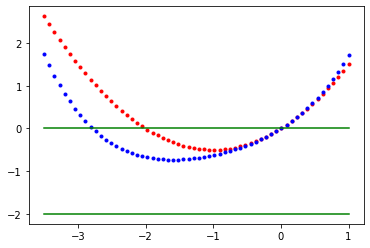

In [63]:
x=np.linspace(-3.5,1,60)
y0=np.zeros(60)
y2=np.ones(60)*(-2)
plt.figure()
plt.plot(x, f1(x), '.r')
plt.plot(x, f2(x), '.b')
plt.plot(x, y0, 'g')
plt.plot(x, y2, 'g')
plt.show()

# Problem 3

### (a)
#### Given $\frac{dy(x)}{dx} = 4x-y(x)$, we have $y'+2y=4x$. So we have integrating factor as $e^{\int2dx} = e^{2x}$.
#### $e^{2x}(y'+2y) = \frac{d}{dx}(e^{2x}y) = 4x$, then integrate both sides and we get $e^{2x}y = \int{4xe^{2x}}dx = 2xe^{2x}-e^{2x} + C$. That is $y=2x-1+Ce^{-2x}$.
#### Also, $y(0)=0$ gives us $C=1$.
#### $y=2x-1+e^{-2x}$

### (b)

In [2]:
#define exact y from (a)
def exactf(x):
    return 2*x-1+math.e**(-2*x)
    
# define RHS of ODE
def f(x,y):
    return 4*x - 2*y

In [43]:
def Heun(a,b,h,f):
    n = int(1/h)
    x = np.linspace(0,1,n+1)
    y = np.zeros(n+1)
    
    for i in range(n):
        y[i+1] = y[i] + h/2*(f(x[i],y[i])+f(x[i+1], y[i]+h*f(x[i],y[i])))
    
    plt.figure()
    plt.plot(x, exactf(y), '.r', label='exact solution')
    plt.plot(x, y, '*b', label="approximation using Heun's method for h="+str(h))
    plt.xlabel('x')
    plt.ylabel('y(x)')
    plt.legend()
    plt.show()

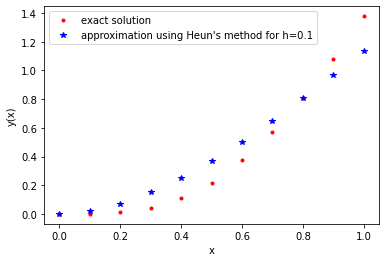

In [44]:
Heun(0,1,0.1,f)

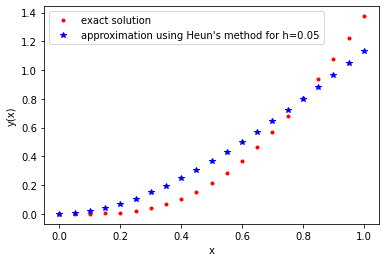

In [33]:
Heun(0,1,0.05,f)

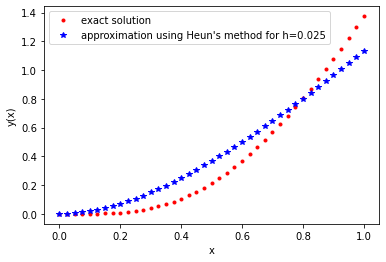

In [34]:
Heun(0,1,0.025,f)

### (c)

In [35]:
def RK4(a,b,h,f):
    n = int(1/h)
    x = np.linspace(0,1,n+1)
    y = np.zeros(n+1)
    
    for i in range(n):
        k1 = f(x[i],y[i])
        k2 = f(x[i]+h/2, y[i]+h/2*k1)
        k3 = f(x[i]+h/2, y[i]+h/2*k2)
        k4 = f(x[i]+h, y[i]+h*k3)
        y[i+1] = y[i] + h/6*(k1+2*k2+2*k3+k4)
        
    plt.figure()
    plt.plot(x, exactf(y), '.r', label='exact solution')
    plt.plot(x, y, '*b', label="approximation using RK4 method for h="+str(h))
    plt.xlabel('x')
    plt.ylabel('y(x)')
    plt.legend()
    plt.show()

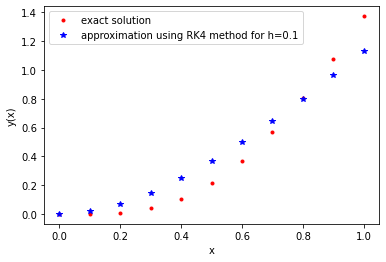

In [36]:
RK4(0,1,0.1,f)

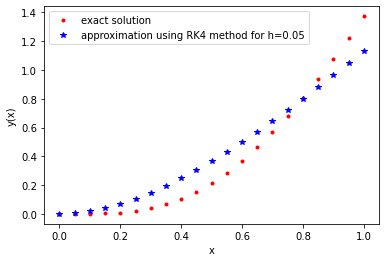

In [37]:
RK4(0,1,0.05,f)

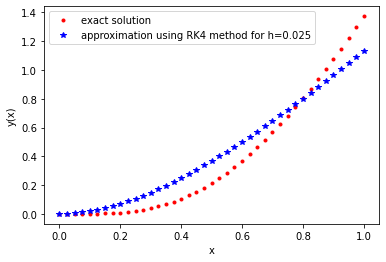

In [38]:
RK4(0,1,0.025,f)

### (d)

In [23]:
def Err(a,b,f):
    Heun_err = []
    RK4_err = []
    ha = []
    h2 = []
    h4 = []
    
    for j in range(1,11):
        h = 2**(-j)
        ha.append(h)
        n = int(1/h)
        x = np.linspace(0,1,n+1)
        yh = np.zeros(n+1)
        yrk = np.zeros(n+1)
        
        for i in range(n):
            #apply Heun's Method
            yh[i+1] = yh[i] + h/2*(f(x[i],yh[i])+f(x[i+1], yh[i]+h*f(x[i],yh[i])))
            
            #apply RK4
            k1 = f(x[i],yrk[i])
            k2 = f(x[i]+h/2, yrk[i]+h/2*k1)
            k3 = f(x[i]+h/2, yrk[i]+h/2*k2)
            k4 = f(x[i]+h, yrk[i]+h*k3)
            yrk[i+1] = yrk[i] + h/6*(k1+2*k2+2*k3+k4)
            
        errh = abs(exactf(1) - yh[-1])
        errk = abs(exactf(1) - yrk[-1])
        Heun_err.append(errh)
        RK4_err.append(errk)
        h2.append(h**2)
        h4.append(h**4)
        
    plt.figure()
    plt.loglog(ha, Heun_err, '.r', label="Heun's Method")
    plt.loglog(ha, RK4_err, '.b', label="RK4")
    plt.loglog(ha, h2, '*g', label="order 2 convergence")
    plt.loglog(ha, h4, '*y', label="order 4 convergence")
    plt.xlabel('h')
    plt.legend()
    plt.show()
    

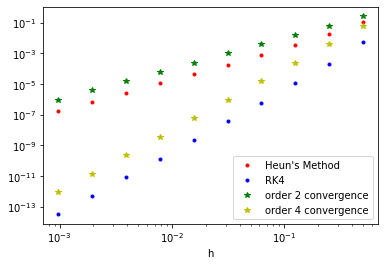

In [24]:
Err(0,1,f)

# Problem4

#### $T_k = \frac{y(x_{k+1}-y_k)}{h}-\frac{1}{2}[f(x_k,y(x_k))+f(x_{k+1},y(x_{k+1})]$
#### Applying Taylor Expansion, $T_k = \frac{y(x_k)+y'(x_k)h_k+\frac{h_k^2}{2}y''(x_k)+O(h^3)-y(x_k)}{h}-\frac{1}{2}[y'(x_k)+y'(x_{k+1})]$
#### $= y'(x_k)+\frac{h_k}{2}y''(x_k)+\frac{h_k^2}{6}y'''(x_k)+O(h^3)-\frac{1}{2}[y'(x_k)+y'(x_k)+y''(x_k)h_k+\frac{h_k^2}{2}y'''(x_k)+O(h^3)]$
#### $=-\frac{h_k^2}{12}y'''(x_k) + O(h^3)$
#### so the local truncation error of the trapezoidal rule is of order $O(h^3)$